In [1]:
import pandas as pd
import numpy as np
import ffn
from datetime import datetime as dt
import seaborn as sns
import matplotlib as mpl

In [2]:
%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
sns.set_style("whitegrid")

# mpl.rcParams.update({
#                      'text.color' : "white",
#                      'lines.linewidth': 3,
#                      'font.size': 16.0,
#                      'legend.facecolor': "182742",
#                      'legend.edgecolor': 'CFB023',
#                      'legend.fancybox': True,
#                      'legend.framealpha': 1.,
#                      'legend.loc': 'right',
#                      'xtick.color': 'white',
#                      'ytick.color': 'white',
#                      'ytick.minor.visible': True,
#                      'axes.facecolor': '#182742',
#                      'axes.edgecolor': 'white',
# #                      'axes.grid.axis': 'y',
# #                      'axes.grid.which': 'minor',
#                      'axes.labelcolor' : "white",
#                      'axes.labelsize': "24",
#                      'axes.labelweight': "bold",
#                      'axes.titlesize': 28,
#                      'axes.titleweight': 'bold',
#                      'axes.titlepad': 20,
#                      'figure.facecolor': '#182742',
# #                      'xtick.bottom': False,
#                     }
#                    )

mpl.rcParams.update({
                     'text.color' : "white",
                     'lines.linewidth': 4,
                     'font.size': 16.0,
                     'legend.facecolor': "182742",
                     'legend.edgecolor': 'CFB023',
                     'legend.fancybox': True,
                     'legend.framealpha': 1.,
                     'legend.loc': 'right',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'ytick.minor.visible': True,
                     'axes.facecolor': '#182742',
                     'axes.edgecolor': 'white',
#                      'axes.grid.axis': 'y',
#                      'axes.grid.which': 'minor',
                     'axes.labelcolor' : "white",
                     'axes.labelsize': "24",
                     'axes.labelweight': "bold",
                     'axes.titlesize': 28,
                     'axes.titleweight': 'bold',
                     'axes.titlepad': 20,
                     'figure.facecolor': '#182742',
#                      'xtick.bottom': False,
                    }
                   )

In [18]:
datafile = 'truecode-performance-20230228.csv'

In [19]:
FOA_START_DATE = dt.fromisoformat('2019-11-19')
FOA_END_DATE = dt.fromisoformat('2022-04-30')
FUND_START_DATE = dt.fromisoformat('2022-05-01')
FUND_END_DATE = dt.fromisoformat('2023-02-28')

In [20]:
def total_return(prices):
  return prices.iloc[-1] / prices.iloc[0] - 1

In [21]:
prices = pd.read_csv(datafile)
prices.Date = pd.to_datetime(prices.Date)
prices.index = prices.Date

In [22]:
prices[['Strategy', 'Bitcoin']]

,Strategy,Bitcoin
Date,,
2019-12-19,"10,000.0000","10,000.0000"
2019-12-20,"10,036.1900","10,052.4900"
2019-12-21,"9,981.8100","9,975.4600"
2019-12-22,"10,342.4300","10,491.0800"
2019-12-23,"10,163.9500","10,233.2600"
...,...,...
2023-02-24,"53,745.7600","32,914.6800"
2023-02-25,"53,536.1600","32,874.6100"
2023-02-26,"54,178.5900","33,439.3200"


# Fund Statistics

In [23]:
sample = prices[FUND_START_DATE:FUND_END_DATE]
stats = sample[['Strategy', 'Bitcoin']].calc_stats()
stats.display()

Stat                 Strategy    Bitcoin
-------------------  ----------  ----------
Start                2022-05-01  2022-05-01
End                  2023-02-28  2023-02-28
Risk-free rate       0.00%       0.00%

Total Return         8.67%       -37.58%
Daily Sharpe         0.37        -0.50
Daily Sortino        0.61        -0.75
CAGR                 10.54%      -43.34%
Max Drawdown         -32.35%     -59.64%
Calmar Ratio         0.33        -0.73

MTD                  -3.03%      0.07%
3m                   24.29%      42.74%
6m                   -4.75%      18.34%
YTD                  29.82%      39.89%
1Y                   -           -
3Y (ann.)            -           -
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  10.54%      -43.34%

Daily Sharpe         0.37        -0.50
Daily Sortino        0.61        -0.75
Daily Mean (ann.)    11.97%      -25.81%
Daily Vol (ann.)     31.93%      51.30%
Daily Skew           0.51        -0.61
Daily K

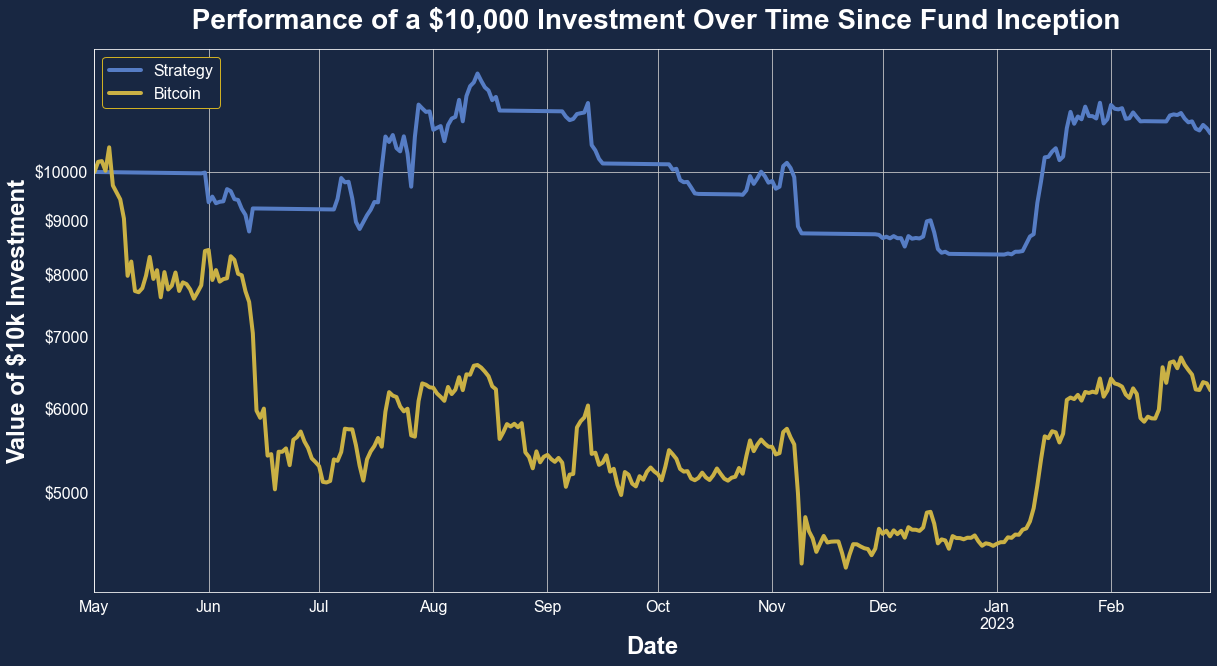

In [24]:
ax = sample[['Strategy', 'Bitcoin']].rebase(value=10000).plot.line(figsize=(20, 10), title=' Performance of a $10,000 Investment Over Time Since Fund Inception', logy=True, color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Value of $10k Investment")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x)}")
ax.get_figure().savefig('graph-returns-fund.pdf', format='pdf')


# Full History

In [25]:
stats = prices[['Strategy', 'Bitcoin']].calc_stats()
stats.display()

Stat                 Strategy    Bitcoin
-------------------  ----------  ----------
Start                2019-12-19  2019-12-19
End                  2023-02-28  2023-02-28
Risk-free rate       0.00%       0.00%

Total Return         431.86%     228.53%
Daily Sharpe         1.20        0.74
Daily Sortino        2.05        1.18
CAGR                 68.72%      45.10%
Max Drawdown         -32.35%     -76.28%
Calmar Ratio         2.12        0.59

MTD                  -3.03%      0.07%
3m                   24.29%      42.74%
6m                   -4.75%      18.34%
YTD                  29.82%      39.89%
1Y                   7.94%       -45.57%
3Y (ann.)            79.12%      39.28%
5Y (ann.)            68.72%      45.10%
10Y (ann.)           -           -
Since Incep. (ann.)  68.72%      45.10%

Daily Sharpe         1.20        0.74
Daily Sortino        2.05        1.18
Daily Mean (ann.)    42.23%      44.44%
Daily Vol (ann.)     35.12%      60.30%
Daily Skew           0.49        -0.79

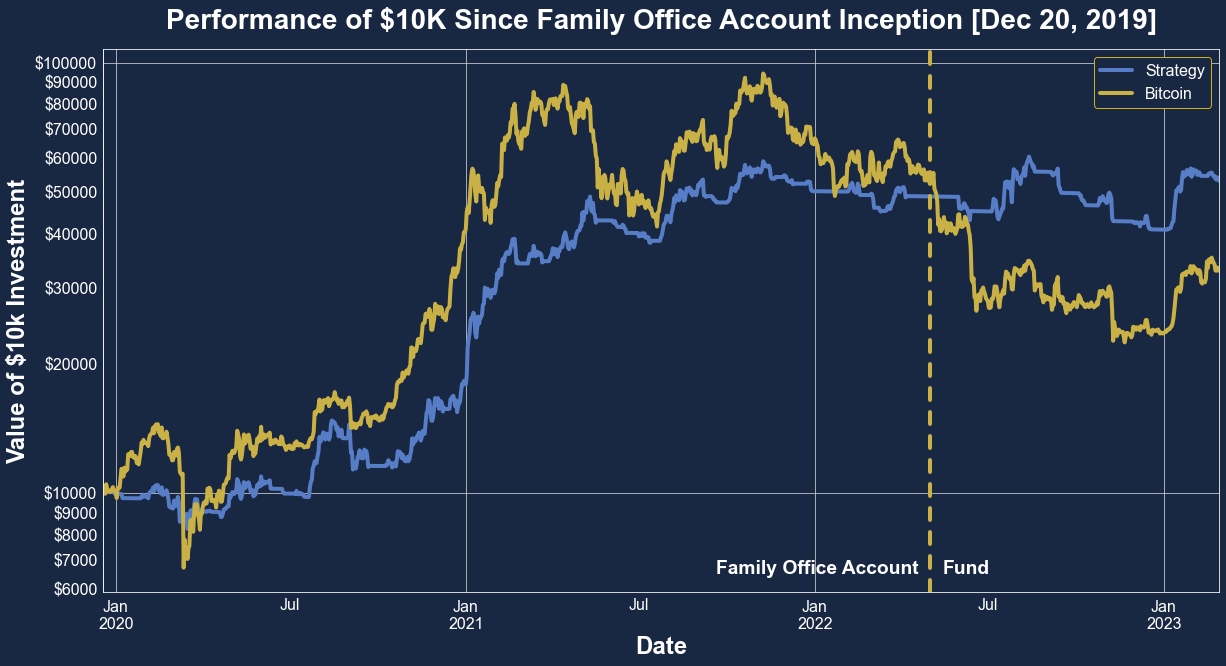

In [77]:
ax = prices[['Strategy', 'Bitcoin']].plot.line(figsize=(20, 10), title='Performance of $10K Since Family Office Account Inception [Dec 20, 2019]', logy=True, color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Value of $10k Investment")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x)}")
ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round")
ax.text(dt(2022, 5, 15), 6500,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2021, 9, 20), 6500,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.get_figure().savefig('graph-returns-all.pdf', format='pdf')


,Strategy,Bitcoin
Date,,
2019-12-19,0.0000,0.0000
2019-12-20,0.0000,0.0000
2019-12-21,-0.0054,-0.0077
2019-12-22,0.0000,0.0000
2019-12-23,-0.0173,-0.0246
...,...,...
2023-02-24,-0.1122,-0.6515
2023-02-25,-0.1156,-0.6519
2023-02-26,-0.1050,-0.6459


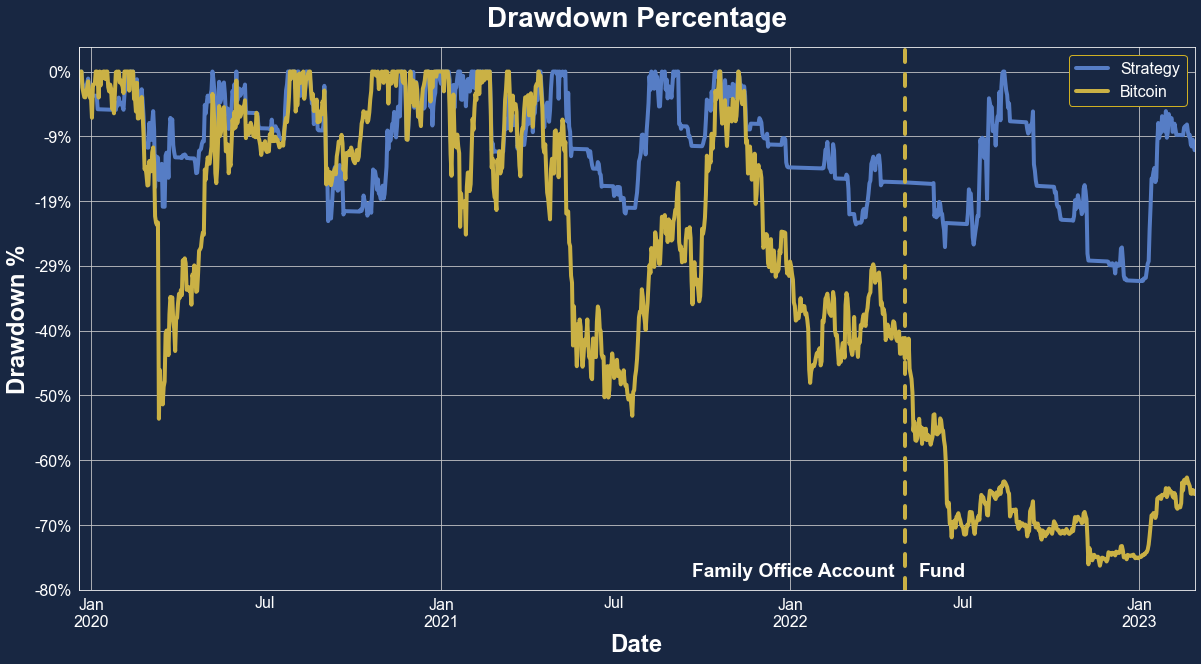

In [73]:
rebased_sample = ffn.rebase(prices[['Strategy', 'Bitcoin']], value=10000)
drawdowns = rebased_sample.to_drawdown_series()
ax = drawdowns.plot(figsize=(20, 10), ylabel='Drawdown %', title='Drawdown Percentage', color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'})
ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round")
ax.text(dt(2022, 5, 15), -.78,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2021, 9, 20), -.78,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large')
fig = ax.get_figure()
ax.yaxis.set_major_formatter(lambda x, pos: f"{int(x * 100)}%")
fig.savefig('drawdowns.pdf')
drawdowns.to_csv('drawdowns.csv')
drawdowns

In [28]:
strategy_monthly_returns = prices.groupby([prices.Date.dt.year, prices.Date.dt.month])['Strategy'].apply(total_return)
strategy_monthly_returns.to_csv("strategy_monthly_returns.csv")
strategy_monthly_returns

Date  Date
2019  12     -0.0041
2020  1      -0.0130
      2      -0.0639
      3      -0.0172
      4       0.0784
      5       0.0441
      6      -0.0877
      7       0.2512
      8       0.0009
      9      -0.1981
      10      0.0315
      11      0.3690
      12      0.1214
2021  1       0.6273
      2       0.1533
      3       0.0415
      4       0.1365
      5       0.0263
      6      -0.0649
      7       0.1174
      8       0.1540
      9      -0.0904
      10      0.1764
      11     -0.0163
      12     -0.0793
2022  1      -0.0016
      2      -0.0189
      3       0.0081
      4      -0.0412
      5      -0.0013
      6      -0.0149
      7       0.2352
      8       0.0413
      9      -0.1081
      10     -0.0391
      11     -0.1098
      12     -0.0346
2023  1       0.3389
      2      -0.0597
Name: Strategy, dtype: float64

# Calculate Correlation

In [29]:
corr = prices[['Strategy', 'Bitcoin']].corr()
corr

,Strategy,Bitcoin
Strategy,1.0000,0.6722
Bitcoin,0.6722,1.0000


In [30]:
strategy_corr = corr[['Strategy']].loc['Bitcoin'].iloc[0]
print("Strategy Correlation = {:.4}".format(strategy_corr))

Strategy Correlation = 0.6722


# Calculate Volatility & Beta

In [31]:
strategy_vol = stats['Strategy'].stats['yearly_vol']
benchmark_vol = stats['Bitcoin'].stats['yearly_vol']
print("Strategy Volatility = {:.4}".format(strategy_vol))
print("Bitcoin Volatility = {:.4}".format(benchmark_vol))

Strategy Volatility = 0.8479
Bitcoin Volatility = 1.548


# Calculate Beta

In [32]:
beta = strategy_corr * (strategy_vol / benchmark_vol)
print("Strategy Beta = {:.4}".format(beta))

Strategy Beta = 0.3682
